     Problem Statement :

            Customers send back a substantial part of the products that they purchase online. Return shipping is expensive for online platforms and return orders are said to reach 50% for certain industries and products. Nevertheless, free or inexpensive return shipping has become a customer expectation and de-facto standard in the fierce online competition on clothing, but shops have indirect ways to influence customer purchase behavior. For purchases where return seems likely, a shop could, for example, restrict payment options or display additional marketing communication.

 **Attribute Information:**

    order_item_id: The Unique id for the Every order
    order_date:The date he/she is ordered
    delivery_date: The delivery date of ordered product
    item_id:The unique specific item for the product
    item_size: Size of the product
    item_color: Product Color
    brand_id: Unique brand id for a product
    item_price:Price of a product
    user_id: unique user id given by company
    user_title:User's title
    user_dob:DOB of user
    user_state:Users Living state
    user_reg_date:User registartion date into the client Website
    return: whether the product is returned or not 
    0:Not returned 
    1:returned
    
    

        Let's start by loading the required libraries and the data.


    We spend  huge amount of time importing some common libraries like NumPy, pandas, matplotlib, seaborn, nltk and many more. To reduce the time we import  pyforest library.It is that library which helps you to work directly without importing other libraries separately.

In [144]:
import pyforest
import warnings
warnings.filterwarnings(action='ignore',message='^internal gelsd')

# Data Description
      

# Importing the dataset

In [145]:
df_raw=pd.read_csv("H:\\Data Science\\Data Sets\\Analyze purposes\\Compay_datasets\\TrainingData_V1.csv")
df_raw.head()
df=df_raw.copy()

         To check whether the data set is load correct or not using head function

In [146]:
df.head()

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return
0,1,22-06-2016,27-06-2016,643,38,navy,30,49.9,30822,Mrs,17-04-1969,1013,23-06-2016,0
1,10,22-06-2016,27-06-2016,195,xxl,grey,46,19.9,30823,Mrs,22-04-1970,1001,15-03-2015,1
2,11,22-06-2016,05-07-2016,25,xxl,grey,5,79.9,30823,Mrs,22-04-1970,1001,15-03-2015,0
3,32,23-06-2016,26-06-2016,173,m,brown,20,19.9,17234,Mrs,09-01-1960,1013,17-02-2015,0
4,43,23-06-2016,26-06-2016,394,40,black,44,90.0,30827,Mrs,NaN,1006,09-02-2016,1


        Exploratory Data Analysis

In [147]:
def SG_EDA(df):
    print('shape of the dataset',df.shape)
    print('Columns in the data set are:', df.columns)
    print(df.info())
    print('The statical data for the given data set is ',df.describe(include='all'))
    
    return df

In [148]:
SG_EDA(df)

shape of the dataset (79945, 14)
Columns in the data set are: Index(['order_item_id', 'order_date', 'delivery_date', 'item_id', 'item_size',
       'item_color', 'brand_id', 'item_price', 'user_id', 'user_title',
       'user_dob', 'user_state', 'user_reg_date', 'return'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79945 entries, 0 to 79944
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_item_id  79945 non-null  int64  
 1   order_date     79945 non-null  object 
 2   delivery_date  72509 non-null  object 
 3   item_id        79945 non-null  int64  
 4   item_size      79945 non-null  object 
 5   item_color     79945 non-null  object 
 6   brand_id       79945 non-null  int64  
 7   item_price     79945 non-null  float64
 8   user_id        79945 non-null  int64  
 9   user_title     79945 non-null  object 
 10  user_dob       72956 non-null  object 
 11  user_state     799

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return
0,1,22-06-2016,27-06-2016,643,38,navy,30,49.9,30822,Mrs,17-04-1969,1013,23-06-2016,0
1,10,22-06-2016,27-06-2016,195,xxl,grey,46,19.9,30823,Mrs,22-04-1970,1001,15-03-2015,1
2,11,22-06-2016,05-07-2016,25,xxl,grey,5,79.9,30823,Mrs,22-04-1970,1001,15-03-2015,0
3,32,23-06-2016,26-06-2016,173,m,brown,20,19.9,17234,Mrs,09-01-1960,1013,17-02-2015,0
4,43,23-06-2016,26-06-2016,394,40,black,44,90.0,30827,Mrs,NaN,1006,09-02-2016,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79940,99942,11-09-2016,12-09-2016,39,41,blue,26,89.9,48232,Mrs,24-10-1941,1007,12-09-2016,1
79941,99954,11-09-2016,NaN,1498,42,green,6,59.9,48234,Mrs,02-10-1962,1007,12-09-2016,0
79942,99980,11-09-2016,12-09-2016,1806,unsized,brown,110,16.9,48240,Mr,22-07-1971,1010,17-02-2015,0
79943,99987,11-09-2016,12-09-2016,1530,l,black,56,79.9,12130,Mrs,NaN,1008,20-01-2016,0


       After Checking Data types I come to know that some of the attributes are misclassified of data types 

        To check the correlation between the independent and dependent columns 

In [149]:
def HeatMap(df,x=True):
        correlations = df.corr()
        ## Create color map ranging between two colors
        cmap = sns.diverging_palette(220, 10, as_cmap=True)
        fig, ax = plt.subplots(figsize=(10, 10))
        fig = sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',square=True, linewidths=.5, annot=x, cbar_kws={"shrink": .75})
        fig.set_xticklabels(fig.get_xticklabels(), rotation = 90, fontsize = 10)
        fig.set_yticklabels(fig.get_yticklabels(), rotation = 0, fontsize = 10)
        plt.tight_layout()
        plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

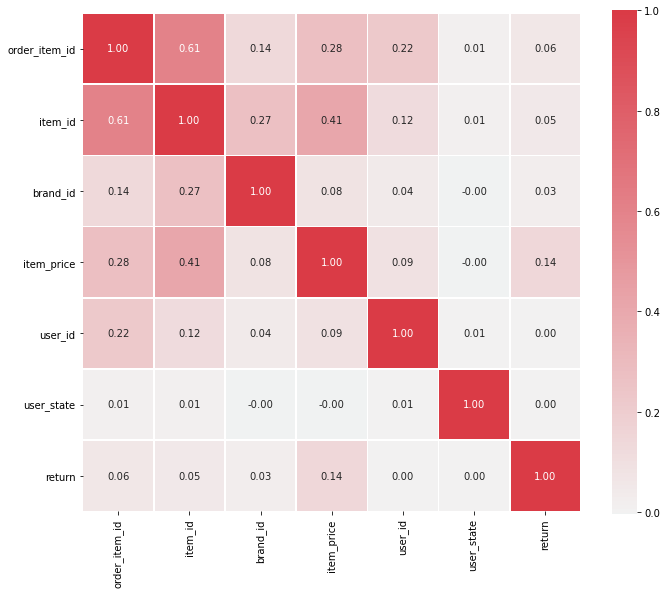

In [150]:
HeatMap(df,x=True)

    Data Cleaning

            Deal with user id


In [151]:
df['counts'] = df['user_id'].map(df['user_id'].value_counts())

        Changing the data types of order_data and delievery date to date time format and created a new column with day of the order using order_date

In [152]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['day_of_order'] = df['order_date'].dt.day_name()

In [153]:
df['delivery_date'] = pd.to_datetime(df['delivery_date'])
df['delieverday_of_order'] = df['order_date'].dt.day_name()

In [154]:
print('The Missing count in order date attribute is:',df['order_date'].isnull().sum())
print('The Missing count in delivery date attribute is:',df['delivery_date'].isnull().sum())

The Missing count in order date attribute is: 0
The Missing count in delivery date attribute is: 7436


        For Imputation of Mising value in Delivery Date. I am doing feature engg for both order date and delivery date and got the number of days of a product is to be delievered for a user

     df['No_of_d_t_R'] means number of days of a product is to be delievred for a user 

In [155]:
df['No_of_d_t_R'] = ((df['delivery_date'] - df['order_date']).dt.days).abs()

<IPython.core.display.Javascript object>

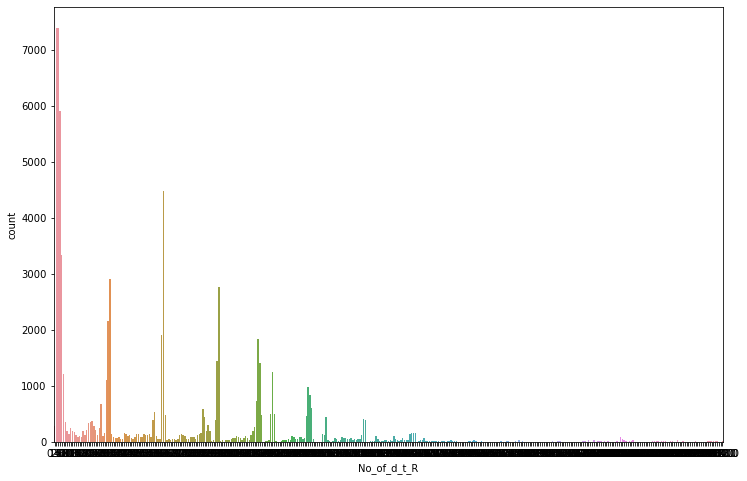

In [156]:
plt.figure(figsize=(12,8))
sns.countplot(df['No_of_d_t_R'])
plt.show()

In [157]:
df['No_of_d_t_R'].value_counts()

2.0      7389
1.0      7384
3.0      5910
61.0     4483
4.0      3336
         ... 
258.0       1
337.0       1
146.0       1
310.0       1
237.0       1
Name: No_of_d_t_R, Length: 375, dtype: int64

            By analysing graph and counts of days we come to know that mostly item is delievered in 2 days.So, I fill We just add 2 days to order date

In [158]:
df["delivery_date"].fillna(df["order_date"]+pd.DateOffset(2), inplace=True)

In [159]:
df['No_of_d_t_R'] = ((df['delivery_date'] - df['order_date']).dt.days).abs()

        Here, I deal with the next attribute named User_title 

In [160]:
df['user_title'].value_counts()

Mrs             76267
Mr               3141
Family            339
Company           105
not reported       93
Name: user_title, dtype: int64

        Analysis of the graph and value_counts tells us that maximum the customers are mrs and some of the records are not reported I consider this are null values and fill with the most repeat

        Here for convience I change mrs to female and mr to male

In [161]:
df['user_title']=df['user_title'].replace('Mrs','Female', regex=True)
df['user_title']=df['user_title'].replace('Mr','Male', regex=True)

In [162]:
df['user_title']=df['user_title'].replace('not reported','Female', regex=True)

      Here Next attributes with Size of the item:

       For consideration, I changed item size to lower letters 

In [163]:
df['item_size'] = df['item_size'].str.lower()

        Checking Unique columns

In [164]:
df['item_size'].unique()

array(['38', 'xxl', 'm', '40', '42', 'l', 'xl', '41', '7', '6+', '18',
       '44', '19', '48', 'unsized', '36', '6', '4', '39', '45', '37',
       '7+', 's', '8', '9+', '50', '5+', '46', '9', '35', '21', '10',
       '43', '11+', '8+', '24', '20', '128', '11', '39+', '38+', '5',
       '12', '31', '140', '41+', '116', '4+', '40+', '56', '26', '47',
       '52', '32', '28', '10+', '27', '22', '152', '30', '1', '104', '33',
       'xs', '37+', '46+', '34', 'xxxl', '29', '13', '42+', '23', '3632',
       '25', '3+', '54', '36+', '44+', '3832', '3332', '4032', '3432',
       '43+', '100', '2', '176', '3', '164', '45+', '90', '105', '58',
       '4034', '3834', '80', '2+', '3132', '14', '12+', '49', '84',
       '3634'], dtype=object)

            On, checking I come to know that there are + symbol also with the size so, I just added in between values which is 0.5

In [165]:
df['item_size'] = df['item_size'].str.replace('+', '.5', regex = False)

        On analysis, there are unsized values are  I considered that are null values 

In [166]:
df['item_size'] = df['item_size'].str.replace('unsized', "", regex = False)
df['item_size']=df['item_size'].replace('',np.nan, regex=True)

In [167]:
df.item_size.unique()

array(['38', 'xxl', 'm', '40', '42', 'l', 'xl', '41', '7', '6.5', '18',
       '44', '19', '48', nan, '36', '6', '4', '39', '45', '37', '7.5',
       's', '8', '9.5', '50', '5.5', '46', '9', '35', '21', '10', '43',
       '11.5', '8.5', '24', '20', '128', '11', '39.5', '38.5', '5', '12',
       '31', '140', '41.5', '116', '4.5', '40.5', '56', '26', '47', '52',
       '32', '28', '10.5', '27', '22', '152', '30', '1', '104', '33',
       'xs', '37.5', '46.5', '34', 'xxxl', '29', '13', '42.5', '23',
       '3632', '25', '3.5', '54', '36.5', '44.5', '3832', '3332', '4032',
       '3432', '43.5', '100', '2', '176', '3', '164', '45.5', '90', '105',
       '58', '4034', '3834', '80', '2.5', '3132', '14', '12.5', '49',
       '84', '3634'], dtype=object)

In [168]:
df['item_size'].dtype

dtype('O')

        We can perform only some operations with object data type, So, i changed into string

In [169]:
df['item_size']=df['item_size'].astype(str)

        Image taken from Internet source If image is not visible use Image link 

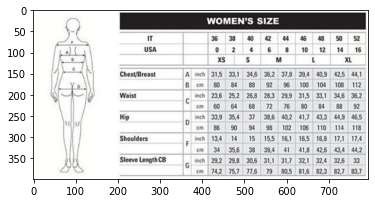

In [170]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread("s.jpg")
plt.imshow(image)
plt.show()

In [171]:
#from IPython.display import Image
#from IPython.core.display import HTML 
#Image(url= "https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.pinterest.com%2Fpin%2F1014646991017277947%2F&psig=AOvVaw2QDSgApkIPplGkL4MAEiRD&ust=1630303616652000&source=images&cd=vfe&ved=0CAsQjRxqFwoTCKCCnrLI1fICFQAAAAAdAAAAABAD")

        By using Universal size chart I took sizes below

In [172]:
df['item_size']=df['item_size'].replace('xs',87, regex=True)
df['item_size']=df['item_size'].replace('xxxl',117, regex=True)
df['item_size']=df['item_size'].replace('xxl',112, regex=True)
df['item_size']=df['item_size'].replace('m',96, regex=True)
df['item_size']=df['item_size'].replace('xl',106, regex=True)
df['item_size']=df['item_size'].replace('l',101, regex=True)
df['item_size']=df['item_size'].replace('s',91, regex=True)

        There are some Na values we filled with median for better result

            Now, we changed item size column to float

In [173]:
df['item_size']=df['item_size'].astype("float64")
df['item_size'].fillna(df['item_size'].median(), inplace=True)

             We consider 0 to 46 are as inches format so, we change into cms 

In [174]:
for col,row in df.iterrows():
    if (row['item_size']<46 and row['item_size'] >=0 ):
        df.loc[col,"item_size"]= row["item_size"]*2.54
    else:
        df.loc[col,"item_size"]= row["item_size"]

        Next, attribute we deal with is user_dob

            Checking the columns Value_counts 

In [175]:
df['user_dob'].value_counts()

21-11-1900    713
21-11-1949    427
10-06-1965    153
11-12-1980     89
20-09-1968     82
             ... 
17-09-1962      1
30-12-1975      1
05-09-1983      1
07-10-1957      1
15-10-1970      1
Name: user_dob, Length: 9007, dtype: int64

In [176]:
df['user_dob'].dtype

dtype('O')

            changing user dob to str bcoz this have to fill the most frequent value

In [177]:
df['user_dob'] =df['user_dob'].astype(str)
df['user_dob'] = df['user_dob'].str.replace('nan','10-06-1965', regex = False)

            Checking for Null values finally

In [178]:
df.isnull().sum()

order_item_id           0
order_date              0
delivery_date           0
item_id                 0
item_size               0
item_color              0
brand_id                0
item_price              0
user_id                 0
user_title              0
user_dob                0
user_state              0
user_reg_date           0
return                  0
counts                  0
day_of_order            0
delieverday_of_order    0
No_of_d_t_R             0
dtype: int64

        Changing user dob and user-reg-date to data time time

In [179]:
df['user_dob'] = pd.to_datetime(df['user_dob'])
df['user_reg_date'] = pd.to_datetime(df['user_reg_date'])

         Deal with Item_colours 

In [180]:
df.item_color.unique()

array(['navy', 'grey', 'brown', 'black', 'bordeaux', 'white', 'purple',
       'magenta', 'stained', 'blue', 'red', 'olive', 'ocher', 'ash',
       'khaki', 'nature', 'denim', 'curry', 'beige', 'turquoise', 'green',
       'anthracite', 'yellow', 'berry', 'petrol', 'brwon', 'dark denim',
       'hibiscus', 'mango', 'azure', 'mocca', 'aubergine', 'ecru', 'gold',
       'orange', 'silver', 'darkblue', 'mint', 'pink', 'copper coin',
       'jade', 'cobalt blue', 'blau', 'aqua', 'aviator', 'champagner',
       'apricot', 'cognac', 'fuchsia', 'pallid', 'aquamarine',
       'terracotta', 'ancient', 'ivory', 'curled', 'coral', 'baltic blue',
       'basalt', 'floral', 'creme', 'mahagoni', 'dark garnet', 'striped',
       '?', 'dark oliv', 'habana', 'dark navy', 'antique pink',
       'dark grey', 'amethyst', 'currant purple', 'kanel', 'ebony',
       'almond', 'avocado', 'caramel', 'opal'], dtype=object)

        On, Analysis some of the names are miss spelled 

In [181]:
df.loc[df['item_color'] == 'blau', 'item_color'] = 'blue'
df.loc[df['item_color'] == 'brwon', 'item_color'] = 'brown'
df.loc[df['item_color'] == 'oliv', 'item_color'] = 'olive'

            Item colour have ? which is null values fill with the most frequent

In [182]:
# most frequency
df.loc[df['item_color'] == '?', 'item_color'] = 'black'

        Feature Enginering

            Here we dervive customer age when he ordered

        df['CAge']=Customer age when he ordered the product

In [183]:
df['CAge'] = (((df['user_dob'] - df['order_date']).dt.days).abs())//365

            we just binned the age of the customer depends upon the age whether he is child, teenager,young_adult

In [184]:
bins=[0,12,19,30,60,116]
group=['child','Teen_ager','Young_adult','Middle_aged','Senior_citizen']
df['CAge']=pd.cut(df['CAge'],bins,labels=group)

             df['AC'] means age of customer with client in days we get subtarct the df['user_reg_date'] by df['order_date'] 

In [185]:
df['AC']=((df['user_reg_date'] - df['order_date']).dt.days).abs()

        Here, and we already  derived the features from the columns then 'user_dob','user_reg_date','order_date','delivery_date','order_item_id' attributes the above attributes dropped  

In [186]:
df=df.drop(columns=['user_dob','user_reg_date','order_date','delivery_date','order_item_id'])

        Now, We deal with return attribute

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='return', ylabel='count'>

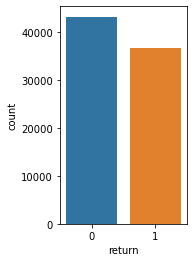

In [187]:
plt.figure(figsize=(5,4))
plt.subplot(121)
sns.countplot(df['return'])

In [188]:
df['return'].value_counts(normalize=True)

0    0.54141
1    0.45859
Name: return, dtype: float64

        Here return column is mostly the balanced data set

<IPython.core.display.Javascript object>

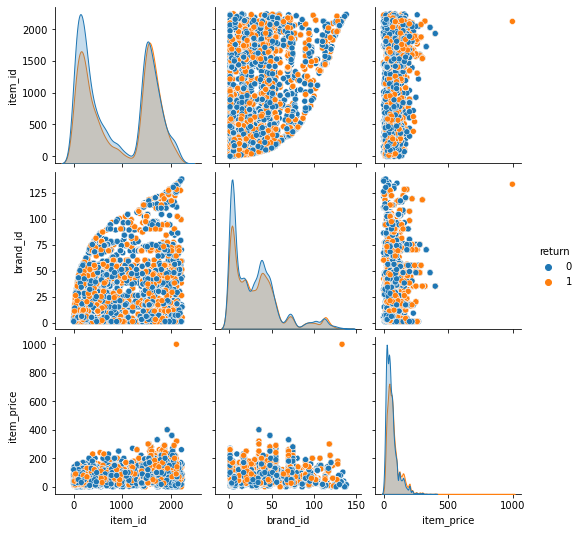

In [189]:
sns.pairplot(df[['item_id','brand_id','return','item_price']], hue = 'return')

    To check Skewness for given data set:
        Skewness
 
      is a measure of symmetry, or more precisely, the lackof symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point. if skewness is between -1 to 1 then we can tell it as Normal diturbution 

In [190]:
df.skew()

item_id         0.076135
item_size      30.348769
brand_id        1.256858
item_price      1.790436
user_id        -0.376819
user_state     -0.003104
return          0.166213
counts          4.603568
No_of_d_t_R     9.496156
AC              0.122580
dtype: float64

        We underatand that item_size, brand id,No_of_d_t_R have the positive skewness

<IPython.core.display.Javascript object>

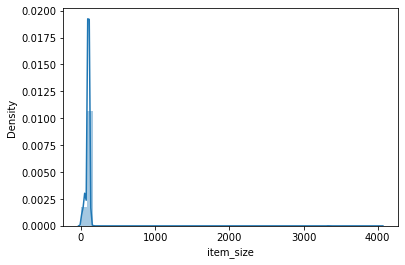

In [191]:
sns.distplot(df.item_size)
plt.show()

<IPython.core.display.Javascript object>

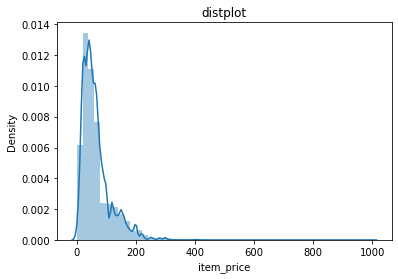

In [192]:
sns.distplot(df.item_price)
plt.title('distplot')
plt.show()

<IPython.core.display.Javascript object>

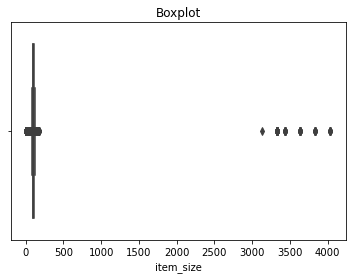

<IPython.core.display.Javascript object>

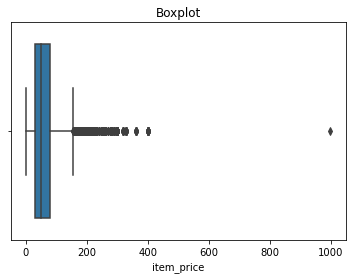

In [193]:
sns.boxplot(df.item_size)
plt.title('Boxplot')
plt.show()
sns.boxplot(df.item_price)
plt.title('Boxplot')
plt.show()

In [194]:
from feature_engine.outliers import Winsorizer
windsoriser = Winsorizer(capping_method='gaussian', # choose skewed for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['item_size','item_price'])
                         
df[['item_size','item_price']]= windsoriser.fit_transform(df[['item_size','item_price']])

windsoriser.left_tail_caps_, windsoriser.right_tail_caps_ 

({'item_size': -68.79641833369031, 'item_price': -6.505136368423678},
 {'item_size': 262.50583730916077, 'item_price': 136.6821788351573})

<IPython.core.display.Javascript object>

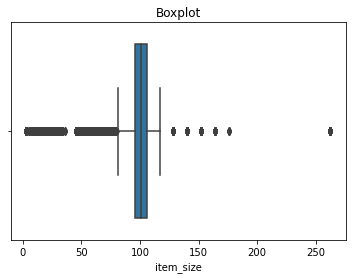

<IPython.core.display.Javascript object>

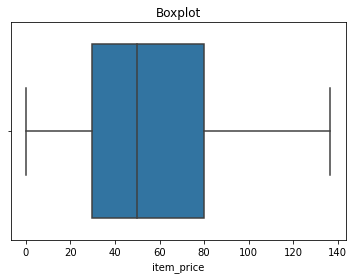

In [195]:
sns.boxplot(df.item_size)
plt.title('Boxplot')
plt.show()
sns.boxplot(df.item_price)
plt.title('Boxplot')
plt.show()

In [196]:
df

,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_state,return,counts,day_of_order,delieverday_of_order,No_of_d_t_R,CAge,AC
0,643,96.52,navy,30,49.9,30822,Female,1013,0,3,Wednesday,Wednesday,5,Middle_aged,1
1,195,112.00,grey,46,19.9,30823,Female,1001,1,17,Wednesday,Wednesday,5,Middle_aged,465
2,25,112.00,grey,5,79.9,30823,Female,1001,0,17,Wednesday,Wednesday,46,Middle_aged,465
3,173,96.00,brown,20,19.9,17234,Female,1013,0,14,Thursday,Thursday,3,Middle_aged,492
4,394,101.60,black,44,90.0,30827,Female,1006,1,2,Thursday,Thursday,3,Middle_aged,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79940,39,104.14,blue,26,89.9,48232,Female,1007,1,2,Wednesday,Wednesday,30,Senior_citizen,30
79941,1498,106.68,green,6,59.9,48234,Female,1007,0,10,Wednesday,Wednesday,2,Middle_aged,30
79942,1806,50.00,brown,110,16.9,48240,Male,1010,0,4,Wednesday,Wednesday,30,Middle_aged,631
79943,1530,101.00,black,56,79.9,12130,Female,1008,0,6,Wednesday,Wednesday,30,Middle_aged,294


In [197]:
X=df[['item_color','user_title','day_of_order','delieverday_of_order','CAge']]
Y=df['return']

In [198]:
from scipy import stats
print("H0 : Assume there is no dependence between two variable")
print("H1 : Assume there is dependence between two variable")
var1 = []
var2 = []
chi2 = []
df = []
p = []
d = [] 
h = []

for i in ['item_color','user_title','day_of_order','delieverday_of_order','CAge']:
            cross_tab = pd.crosstab(X[str(i)],Y)
            chi2_stat, p_val, dof, ex = stats.chi2_contingency(cross_tab)
            var1.append(i)
            var2.append('return')
            chi2.append(chi2_stat)
            df.append(dof)
            p.append(p_val)
            if p_val > 0.05:
                d.append('Independent')
                h.append('Accepted')
            else:
                d.append('Dependent')
                h.append('Rejected')
a = pd.DataFrame([var1,var2,chi2,df,p,d,h],index=['variable 1','variable 2','Chi2 Value','DOF','P Value','Decison (5% LOS)','Null Hypothesis']).T
a

H0 : Assume there is no dependence between two variable
H1 : Assume there is dependence between two variable


,variable 1,variable 2,Chi2 Value,DOF,P Value,Decison (5% LOS),Null Hypothesis
0,item_color,return,621.525,73,6.03212e-88,Dependent,Rejected
1,user_title,return,32.8875,3,3.40159e-07,Dependent,Rejected
2,day_of_order,return,109.683,6,2.3749e-21,Dependent,Rejected
3,delieverday_of_order,return,109.683,6,2.3749e-21,Dependent,Rejected
4,CAge,return,99.8911,4,1.03761e-20,Dependent,Rejected


In [124]:
from sklearn.model_selection import train_test_split
x,y = train_test_split(df,test_size = 0.15, random_state=101)

In [125]:
from pycaret.classification import *
exp_reg101 = setup(data = x, target = 'return',train_size=0.8,imputation_type='iterative',
                   iterative_imputation_iters=10,normalize_method = 'minmax',
                   transformation=True,unknown_categorical_method='most_frequent',
                   feature_selection=True,feature_selection_threshold=0.85,fold=6,
                  fold_shuffle=True,n_jobs=-1,session_id=123,silent=True,categorical_features=['item_color','user_title','CAge'],
                   create_clusters=True,cluster_iter=10,fix_imbalance=True)

,Description,Value
0,session_id,123
1,Target,return
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(67953, 15)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [101]:
#best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.6318,0.6884,0.6419,0.5912,0.6155,0.2634,0.2642,45.5650
xgboost,Extreme Gradient Boosting,0.6300,0.6858,0.6371,0.5898,0.6125,0.2594,0.2602,32.1500
rf,Random Forest Classifier,0.6276,0.6839,0.6006,0.5933,0.5969,0.2510,0.2510,35.9317
lightgbm,Light Gradient Boosting Machine,0.6253,0.6831,0.6786,0.5784,0.6245,0.2554,0.2587,24.4400
gbc,Gradient Boosting Classifier,0.6145,0.6652,0.7152,0.5631,0.6301,0.2393,0.2468,32.0467
ada,Ada Boost Classifier,0.6091,0.6548,0.6954,0.5598,0.6202,0.2271,0.2328,27.2900
et,Extra Trees Classifier,0.6049,0.6421,0.5398,0.5742,0.5564,0.2009,0.2013,33.6733
dt,Decision Tree Classifier,0.5863,0.5846,0.5626,0.5482,0.5553,0.1687,0.1688,29.3700
lr,Logistic Regression,0.5831,0.6173,0.5917,0.5421,0.5658,0.1664,0.1670,36.5467
svm,SVM - Linear Kernel,0.5829,0.0000,0.5466,0.5457,0.5460,0.1602,0.1603,27.5833


In [126]:
rf = create_model('xgboost', round = 3,fold = 3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.645,0.707,0.643,0.608,0.625,0.289,0.289
1,0.641,0.706,0.636,0.604,0.619,0.280,0.280
2,0.646,0.707,0.643,0.609,0.626,0.291,0.291
Mean,0.644,0.706,0.641,0.607,0.623,0.287,0.287
SD,0.002,0.000,0.003,0.002,0.003,0.005,0.005


In [127]:
tuned_rf = tune_model(rf, optimize = 'Accuracy',fold = 3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5841,0.6870,0.9259,0.5271,0.6718,0.2076,0.2772
1,0.5825,0.6878,0.9294,0.5259,0.6717,0.2050,0.2767
2,0.5805,0.6826,0.9185,0.5249,0.6681,0.2003,0.2657
Mean,0.5824,0.6858,0.9246,0.5260,0.6705,0.2043,0.2732
SD,0.0015,0.0023,0.0046,0.0009,0.0017,0.0030,0.0053


In [128]:
rb = create_model('catboost', round = 3,fold = 3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.650,0.711,0.656,0.611,0.633,0.300,0.300
1,0.648,0.712,0.650,0.610,0.629,0.295,0.295
2,0.650,0.710,0.654,0.611,0.632,0.299,0.299
Mean,0.649,0.711,0.653,0.611,0.631,0.298,0.298
SD,0.001,0.001,0.002,0.001,0.002,0.002,0.002


In [132]:
tuned_rb= tune_model(rb, optimize = 'Accuracy',fold = 3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6369,0.6966,0.6266,0.6006,0.6134,0.2714,0.2716
1,0.6389,0.6985,0.6246,0.6036,0.6139,0.2749,0.2750
2,0.6417,0.6992,0.6266,0.6067,0.6165,0.2804,0.2805
Mean,0.6391,0.6981,0.6259,0.6036,0.6146,0.2755,0.2757
SD,0.0020,0.0011,0.0010,0.0025,0.0014,0.0037,0.0037


In [133]:
rk = create_model('rf', round = 3,fold = 3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.646,0.705,0.618,0.615,0.616,0.288,0.288
1,0.649,0.707,0.615,0.619,0.617,0.293,0.293
2,0.646,0.701,0.612,0.616,0.614,0.288,0.288
Mean,0.647,0.704,0.615,0.616,0.616,0.289,0.289
SD,0.001,0.003,0.002,0.002,0.001,0.002,0.002


In [135]:
tuned_rk= tune_model(rk, optimize = 'Accuracy',fold = 3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6173,0.6675,0.7003,0.5679,0.6272,0.2428,0.2484
1,0.6213,0.6675,0.6832,0.5740,0.6238,0.2484,0.2522
2,0.6136,0.6615,0.7173,0.5625,0.6305,0.2379,0.2456
Mean,0.6174,0.6655,0.7003,0.5681,0.6272,0.2430,0.2487
SD,0.0031,0.0028,0.0140,0.0047,0.0027,0.0043,0.0027


In [130]:
unseen_predictions = predict_model(rb, data=y)
unseen_predictions.head()

,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_state,return,counts,day_of_order,delieverday_of_order,No_of_d_t_R,CAge,AC,Label,Score
47922,1532,91.00,coral,37,26.9,44429,Female,1001,1,11,Tuesday,Tuesday,4,Middle_aged,217,1,0.5738
49013,1576,101.60,anthracite,90,89.9,18000,Female,1008,1,3,Saturday,Saturday,91,Middle_aged,326,1,0.5692
25942,2030,96.00,berry,29,69.9,5750,Male,1002,1,5,Monday,Monday,31,Senior_citizen,462,0,0.6091
47285,2017,96.00,anthracite,117,109.9,32831,Female,1015,0,7,Wednesday,Wednesday,4,Middle_aged,300,1,0.6669
55533,36,99.06,stained,1,59.9,18840,Female,1002,0,2,Sunday,Sunday,61,Middle_aged,446,0,0.6422


In [131]:
from pycaret.utils import check_metric
check_metric(unseen_predictions['return'], unseen_predictions.Label, 'Accuracy')

0.6509

In [120]:
df_test=pd.read_csv("H:\\Data Science\\Data Sets\\Analyze purposes\\Compay_datasets\\test.csv")
test=df_test.copy()
test.head()

,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_state,No_of_d_t_R,CAge,AC
0,92,106.0,turquoise,42,69.90,9392,Female,1010,3,Middle_aged,91
1,2,112.0,green,2,19.90,9392,Female,1010,9,Middle_aged,91
2,895,101.0,white,39,39.95,30826,Female,1001,3,Middle_aged,492
3,5,101.0,white,5,69.90,30828,Female,1008,2,Middle_aged,154
4,55,101.0,purple,1,89.90,22948,Female,1001,2,Middle_aged,492


In [121]:
unseen_predict = predict_model(tuned_rb, data=test)
unseen_predict.head()

,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_state,No_of_d_t_R,CAge,AC,Label,Score
0,92,106.0,turquoise,42,69.90,9392,Female,1010,3,Middle_aged,91,1,0.8084
1,2,112.0,green,2,19.90,9392,Female,1010,9,Middle_aged,91,0,0.6839
2,895,101.0,white,39,39.95,30826,Female,1001,3,Middle_aged,492,1,0.6953
3,5,101.0,white,5,69.90,30828,Female,1008,2,Middle_aged,154,0,0.7377
4,55,101.0,purple,1,89.90,22948,Female,1001,2,Middle_aged,492,0,0.7736


In [122]:
unseen_predict.to_csv('a2.csv')